In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

# Data Preperation

Extract data from csv file and display the shape and size. Shape of the data set should be (372037, 785).

In [4]:
data = pd.read_csv("./data/handwritten_data_785.csv", encoding = "utf8")
print(data.shape)

(372037, 785)


Need to shuffle data.

In [5]:
data = data.values
np.random.shuffle(data)
print(data.shape)

(372037, 785)


In [6]:
X, y = data[:,1:], data[:,0]
print("X Shape:")
print(X.shape)
print("y Shape:")
print(y.shape)

X Shape:
(372037, 784)
y Shape:
(372037,)


Perform 80/20 Training/Test split.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

('X_train shape: ', (297629, 784))
('y_train shape: ', (297629,))
('X_test shape: ', (74408, 784))
('y_test shape: ', (74408,))


Make sure that there are only 26 different classifications in the output set. Examine the distribution of the labels by plotting the data.

In [76]:
# X_train /= 255
# X_test /= 255


# mean_image = np.mean(X_train, axis=0).astype(np.int64)
# X_train -= mean_image
# X_test -= mean_image

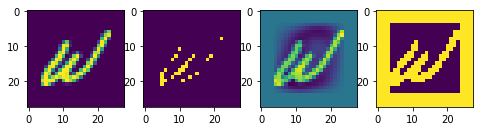

In [111]:
X_example = X_train[10]

fig= plt.figure(figsize=(8,8))
# Original image
X_example_orig_2d = X_example.reshape(28,28)
fig.add_subplot(1,4,1)
plt.imshow(X_example_orig_2d)

# Normalized Image
X_example_norm_2d = (X_example / 255).reshape(28,28)
fig.add_subplot(1,4,2)
plt.imshow(X_example_norm_2d)

# Mean Image
mean_image = np.mean(X_train, axis=0).astype(np.int64)
X_example_mean_2d = (X_example - mean_image).reshape(28,28)
fig.add_subplot(1,4,3)
plt.imshow(X_example_mean_2d)

# Combo Image
X_example_combo_2d = ((X_example - mean_image)/255).reshape(28,28)
fig.add_subplot(1,4,4)
plt.imshow(X_example_combo_2d)

plt.show()

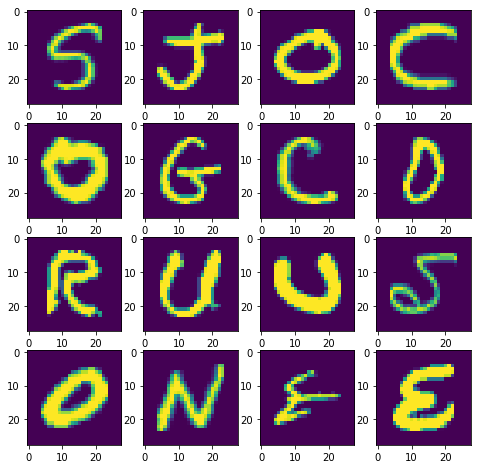

In [116]:
fig = plt.figure(figsize=(8,8))
columns = 4
rows = 4
for i in range(1, columns*rows + 1):
    img = np.random.randint(X_train.shape[0])
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[img].reshape(28,28))
plt.show()

Class 14: 58154
Class 18: 48463
Class 20: 29117
Class 2: 23555
Class 19: 22668
Class 15: 19378
Class 13: 19093
Class 0: 14780
Class 12: 12454
Class 17: 11669
Class 11: 11641
Class 4: 11493
Class 24: 10909
Class 22: 10884
Class 3: 10599
Class 1: 8977
Class 9: 8615
Class 7: 7265
Class 23: 6298
Class 25: 6097
Class 16: 5890
Class 6: 5795
Class 10: 5621
Class 5: 1164
Class 8: 1118
Class 21: 340


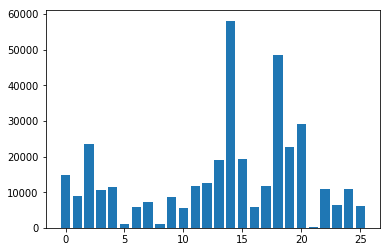

In [48]:
unique, counts = np.unique(y, return_counts=True)
label_dist = sorted(zip(unique, counts), key= lambda (k,v):(v,k), reverse=True)
for label,count in label_dist:
    print("Class {}: {}".format(label,count))
plt.bar(unique, counts)
plt.show()

# Le Net 1 Model